### Customer churn occurs when a customer stops using a company’s service lead to revenue loss. Analyzing churn helps businesses understand why customers leave and how to improve retention. High churn rates can affect revenue and business growth. By analyzing churn patterns businesses can take proactive steps to retain customers.

In [1]:
import numpy as np
import pandas as pd

# give you file path here
dataset = pd.read_csv("customer_churn_dataset-testing-master.csv")

dataset.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


# Understanding the Dataset
To gain insights into the dataset we first check for missing values and understand its structure. The dataset includes features such as:

In [2]:
print(dataset.isnull().sum())
print(dataset.describe())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   6437

#### tenure – The number of months a customer has stayed with the company.
#### Churn – The target variable i.e Yes for customer churned and No for customer stayed.

# Analyzing Churn Distribution
We check the number of churners and non-churners to understand the balance of the dataset.

Churn
0    33881
1    30493
Name: count, dtype: int64


C:\Users\angel\AppData\Local\Temp\ipykernel_8416\2545296422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=dataset, palette='coolwarm')


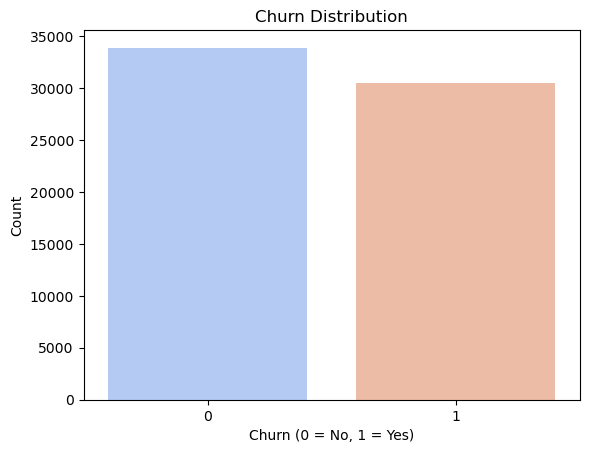

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print(dataset['Churn'].value_counts())
sns.countplot(x='Churn', data=dataset, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Data Preprocessing
Handling Missing and Incorrect Values
Before processing we ensure that all numerical columns contain valid values. The TotalCharges column sometimes has empty spaces which need to be converted to numerical values.

# Handling Categorical Variables
Some features like State, International Plan and Voice Mail Plan are categorical and must be converted into numerical values for model training.

LabelEncoder() converts categorical values into numerical form. Each unique category is assigned a numeric label.
The loop iterates through each categorical column and applies fit_transform() to encode categorical variables into numbers.

In [9]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
categorical_cols = ['Gender', 'Subscription Type','Contract Length'
                    ]
for col in categorical_cols:
    dataset[col] = labelencoder.fit_transform(dataset[col])

# Feature Selection and Splitting Data
We separate the features (X) and target variable (y) and split the dataset into training and testing sets.

X = dataset.drop(['customerID', 'Churn'], axis=1) removes the customerID (irrelevant for prediction) and Churn column (target variable).
y = dataset['Churn'] defines y as the target variable, which we want to predict.
train_test_split() splits data into 80% training and 20% testing for model evaluation.



In [11]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['CustomerID', 'Churn'], axis=1)
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
Since features are on different scales we apply standardization to improve model performance. It prevents models from being biased toward larger numerical values and improves convergence speed in optimization algorithms like gradient descent

StandardScaler(): Standardizes data by transforming it to have a mean of 0 and a standard deviation of 1 ensuring all features are on a similar scale.
fit_transform(X_train): Fits the scaler to the training data and transforms it.
transform(X_test): Transforms the test data using the same scaling parameters.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Prediction
For training our model we use Random Forest Classifier. It is an ensemble learning method that combines the results of multiple decision trees to make a final prediction.

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Evaluation
Accuracy Score
To measure model performance we calculate accuracy using the accuracy_score function.

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


# Confusion Matrix and Performance Metrics

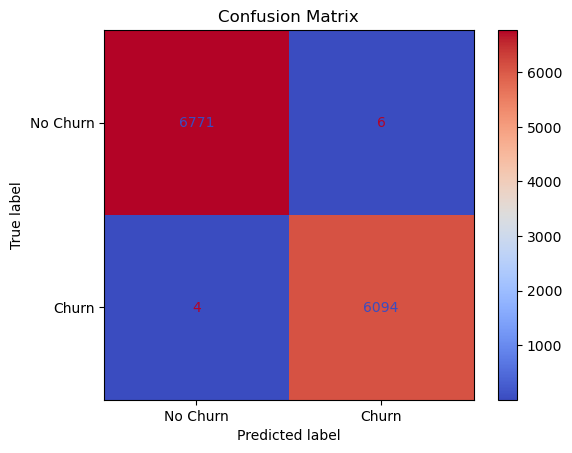

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()

Confusion matrix shows how well the model predicts customer churn. It correctly identifies 6771 non-churners and 6094 churners. However 6 non-churners are wrongly classified as churners and 4 churners are missed.